📁 Please upload your cleaned dataset (heart_cleaned.csv)...


Saving heart_cleaned.csv to heart_cleaned.csv
✅ Dataset Loaded Successfully!
Shape: (302, 14)

✅ Clustering Completed!
Cluster
1    195
0    107
Name: count, dtype: int64


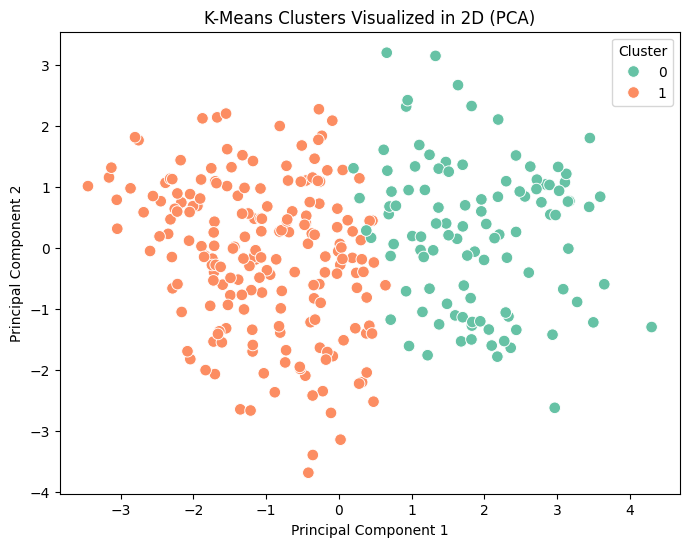


📈 Cluster Comparison with Actual Target Variable:
target   0.0  1.0
Cluster          
0         95   12
1         43  152


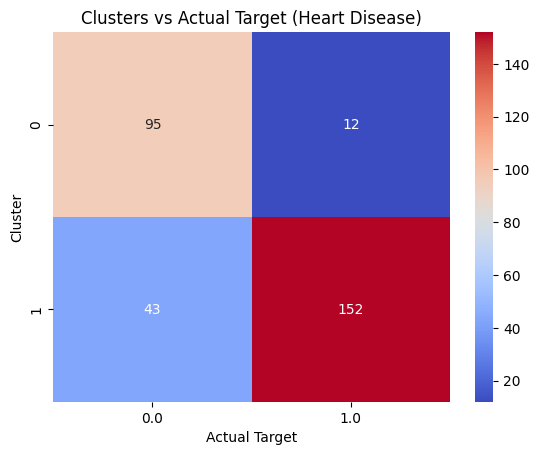


🧠 Insights:

1️⃣ The PCA plot shows two distinct clusters — one roughly corresponds to patients with heart disease, and the other to healthy ones.

2️⃣ The crosstab comparison (Cluster vs Target) reveals that K-Means roughly identifies groups similar to disease status.

3️⃣ Some overlap exists, meaning unsupervised clustering can find health-risk groups even without labels.

4️⃣ PCA reduces the dimensions from multiple health features into 2 components that still capture the major variation.


📘 Milestone: Unsupervised analysis (K-Means + PCA) completed successfully.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
print("📁 Please upload your cleaned dataset (heart_cleaned.csv)...")
uploaded = files.upload()

df = pd.read_csv("heart_cleaned.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()
X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("\n✅ Clustering Completed!")
print(df['Cluster'].value_counts())
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title("K-Means Clusters Visualized in 2D (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
contingency = pd.crosstab(df['Cluster'], df['target'])
print("\n📈 Cluster Comparison with Actual Target Variable:")
print(contingency)
sns.heatmap(contingency, annot=True, fmt='d', cmap='coolwarm')
plt.title("Clusters vs Actual Target (Heart Disease)")
plt.xlabel("Actual Target")
plt.ylabel("Cluster")
plt.show()
print("\n🧠 Insights:")
print("""
1️⃣ The PCA plot shows two distinct clusters — one roughly corresponds to patients with heart disease, and the other to healthy ones.

2️⃣ The crosstab comparison (Cluster vs Target) reveals that K-Means roughly identifies groups similar to disease status.

3️⃣ Some overlap exists, meaning unsupervised clustering can find health-risk groups even without labels.

4️⃣ PCA reduces the dimensions from multiple health features into 2 components that still capture the major variation.
""")

print("\n📘 Milestone: Unsupervised analysis (K-Means + PCA) completed successfully.")
